In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/praktikum_ml/praktikum06/data/Iris.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
df["Species"].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [8]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

In [9]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
y.head()

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [15]:
from operator import mod
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [18]:
y_pred = model.predict(X_test)

print(f"Akurasi: {accuracy_score(y_test, y_pred)* 100:.2f}%")
print(f"\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

Akurasi: 100.00%

Laporan Klasifikasi:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30




Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


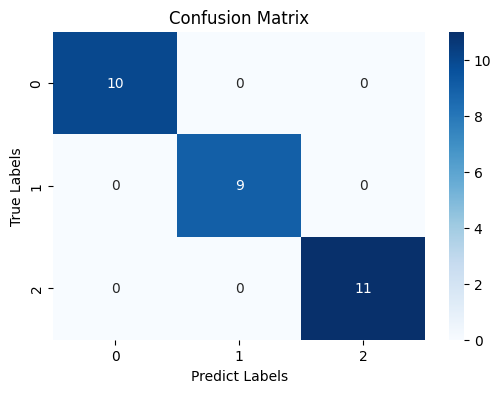

In [19]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predict Labels")
plt.ylabel("True Labels")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

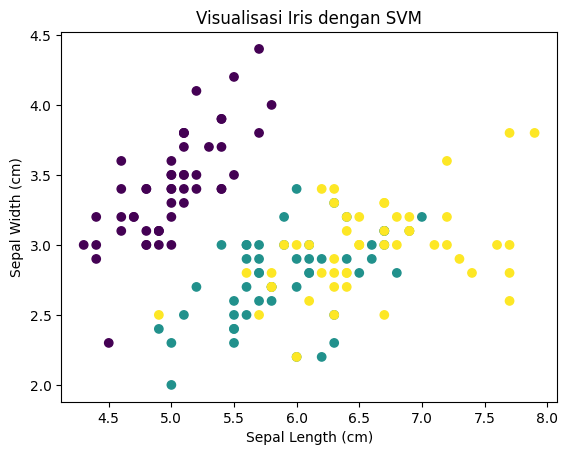

In [20]:
plt.scatter(df['SepalLengthCm'], df['SepalWidthCm'], c=df['Species'].astype('category').cat.codes)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Visualisasi Iris dengan SVM')
plt.show

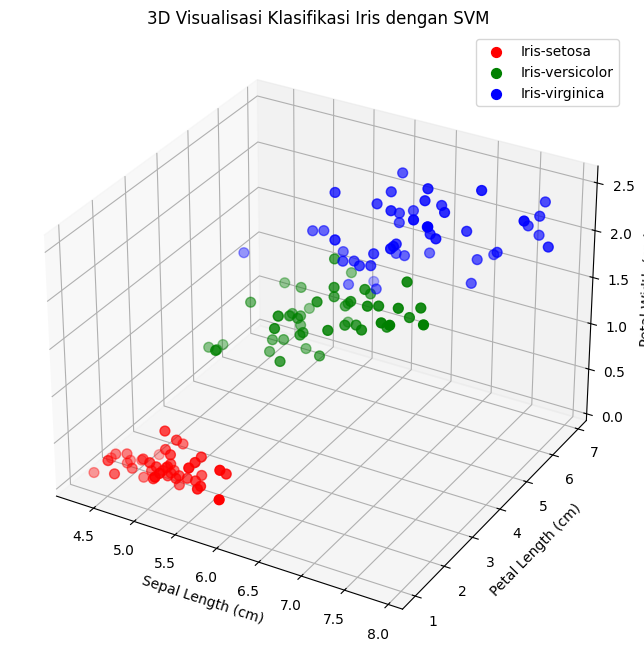

In [22]:
le = LabelEncoder()
df['SpeciesEncoded'] = le.fit_transform(df['Species'])

# 8. Plot 3D hasil klasifikasi
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Warna untuk tiap kelas
colors = ['r', 'g', 'b']
labels = le.classes_

# Plot tiap spesies dengan warna berbeda
for i, species in enumerate(labels):
    subset = df[df['SpeciesEncoded'] == i]
    ax.scatter(
        subset['SepalLengthCm'],
        subset['PetalLengthCm'],
        subset['PetalWidthCm'],
        color=colors[i],
        label=species,
        s=50
    )

# Label sumbu dan judul
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Petal Length (cm)')
ax.set_zlabel('Petal Width (cm)')
ax.set_title('3D Visualisasi Klasifikasi Iris dengan SVM')

ax.legend()
plt.show()

**PRAKTIKUM MANDIRI**
https://raw.githubusercontent.com/datasciencedojo/datasets/master/WineQuality.csv

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [26]:
# Sumber: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [31]:
print("Dataset shape:", df.shape)
print(df.head())

Dataset shape: (1599, 12)
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8      

In [32]:
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [33]:
X = df.drop(columns=['quality'])
y = df['quality']

In [35]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [36]:
svm_model = SVC(kernel='rbf', C=5, gamma='scale')
svm_model.fit(X_train, y_train)

SVC(C=5)

In [40]:
y_pred = svm_model.predict(X_test)

print("\nEvaluasi Model")
print("Akurasi :", round(accuracy_score(y_test, y_pred), 4))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Evaluasi Model
Akurasi : 0.6031

Confusion Matrix:
 [[ 0  0  1  0  0  0]
 [ 0  1  6  3  0  0]
 [ 0  0 99 30  1  0]
 [ 0  2 42 79  9  0]
 [ 0  0  0 27 14  1]
 [ 0  0  0  2  3  0]]

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.33      0.10      0.15        10
           5       0.67      0.76      0.71       130
           6       0.56      0.60      0.58       132
           7       0.52      0.33      0.41        42
           8       0.00      0.00      0.00         5

    accuracy                           0.60       320
   macro avg       0.35      0.30      0.31       320
weighted avg       0.58      0.60      0.59       320



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


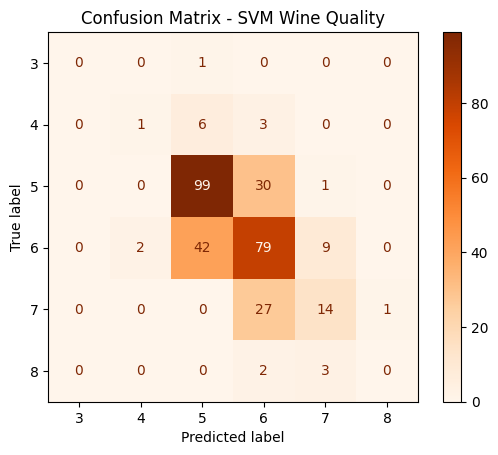

In [41]:
ConfusionMatrixDisplay.from_estimator(svm_model, X_test, y_test, cmap='Oranges')
plt.title("Confusion Matrix - SVM Wine Quality")
plt.show()

In [44]:
df_vis = df[['alcohol', 'density', 'sulphates', 'quality']]

In [45]:
le = LabelEncoder()
df_vis['QualityEncoded'] = le.fit_transform(df_vis['quality'])

/tmp/ipython-input-3335961338.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vis['QualityEncoded'] = le.fit_transform(df_vis['quality'])


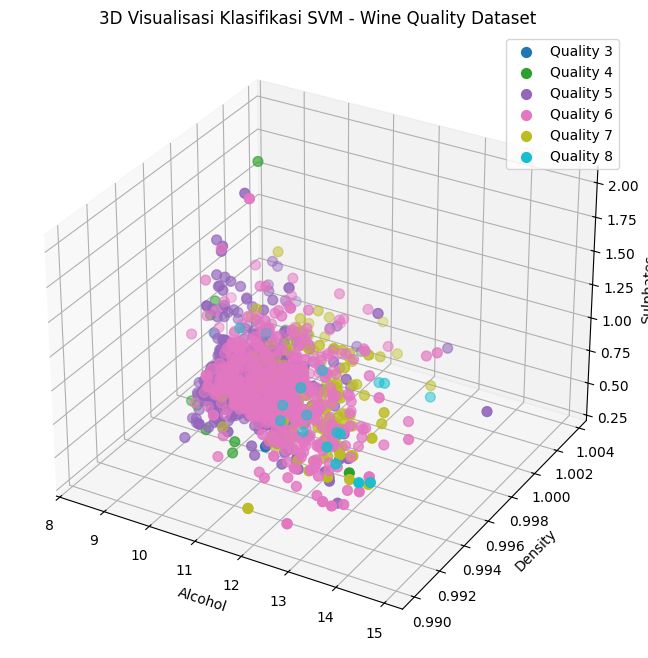

In [47]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
colors = plt.cm.tab10(np.linspace(0, 1, len(df_vis['QualityEncoded'].unique())))
labels = sorted(df_vis['quality'].unique())

for i, q in enumerate(labels):
    subset = df_vis[df_vis['quality'] == q]
    ax.scatter(
        subset['alcohol'],
        subset['density'],
        subset['sulphates'],
        color=colors[i],
        label=f'Quality {q}',
        s=50
    )

ax.set_xlabel('Alcohol')
ax.set_ylabel('Density')
ax.set_zlabel('Sulphates')
ax.set_title('3D Visualisasi Klasifikasi SVM - Wine Quality Dataset')
ax.legend()
plt.show()